In [1]:
import matplotlib.pyplot as plt
import numpy as np

def moving_avg(x, y, step):
    N    = len(x)
    x2   = []
    y2   = []
    for i in range(step, N):
        year = np.mean(x[i-step:i+step+1]) # x[i]
        avg  = np.mean( y[i-step:i+step+1])
        x2.append(year)
        y2.append(avg) 
    return x2, y2


def format_axis(ax):   
    for pos in ['right', 'top', 'left']:
        ax.spines[pos].set_edgecolor('white')    
    ax.tick_params(axis='x', length=6, width=2, colors='black')
    ax.tick_params(axis='y', length=6, width=2, colors='black') 
    for tick in ax.xaxis.get_major_ticks():  tick.label.set_fontsize(29) 
    for tick in ax.yaxis.get_major_ticks():  tick.label.set_fontsize(29)

Text(281.875, 0.5, 'Average happiness                         ')

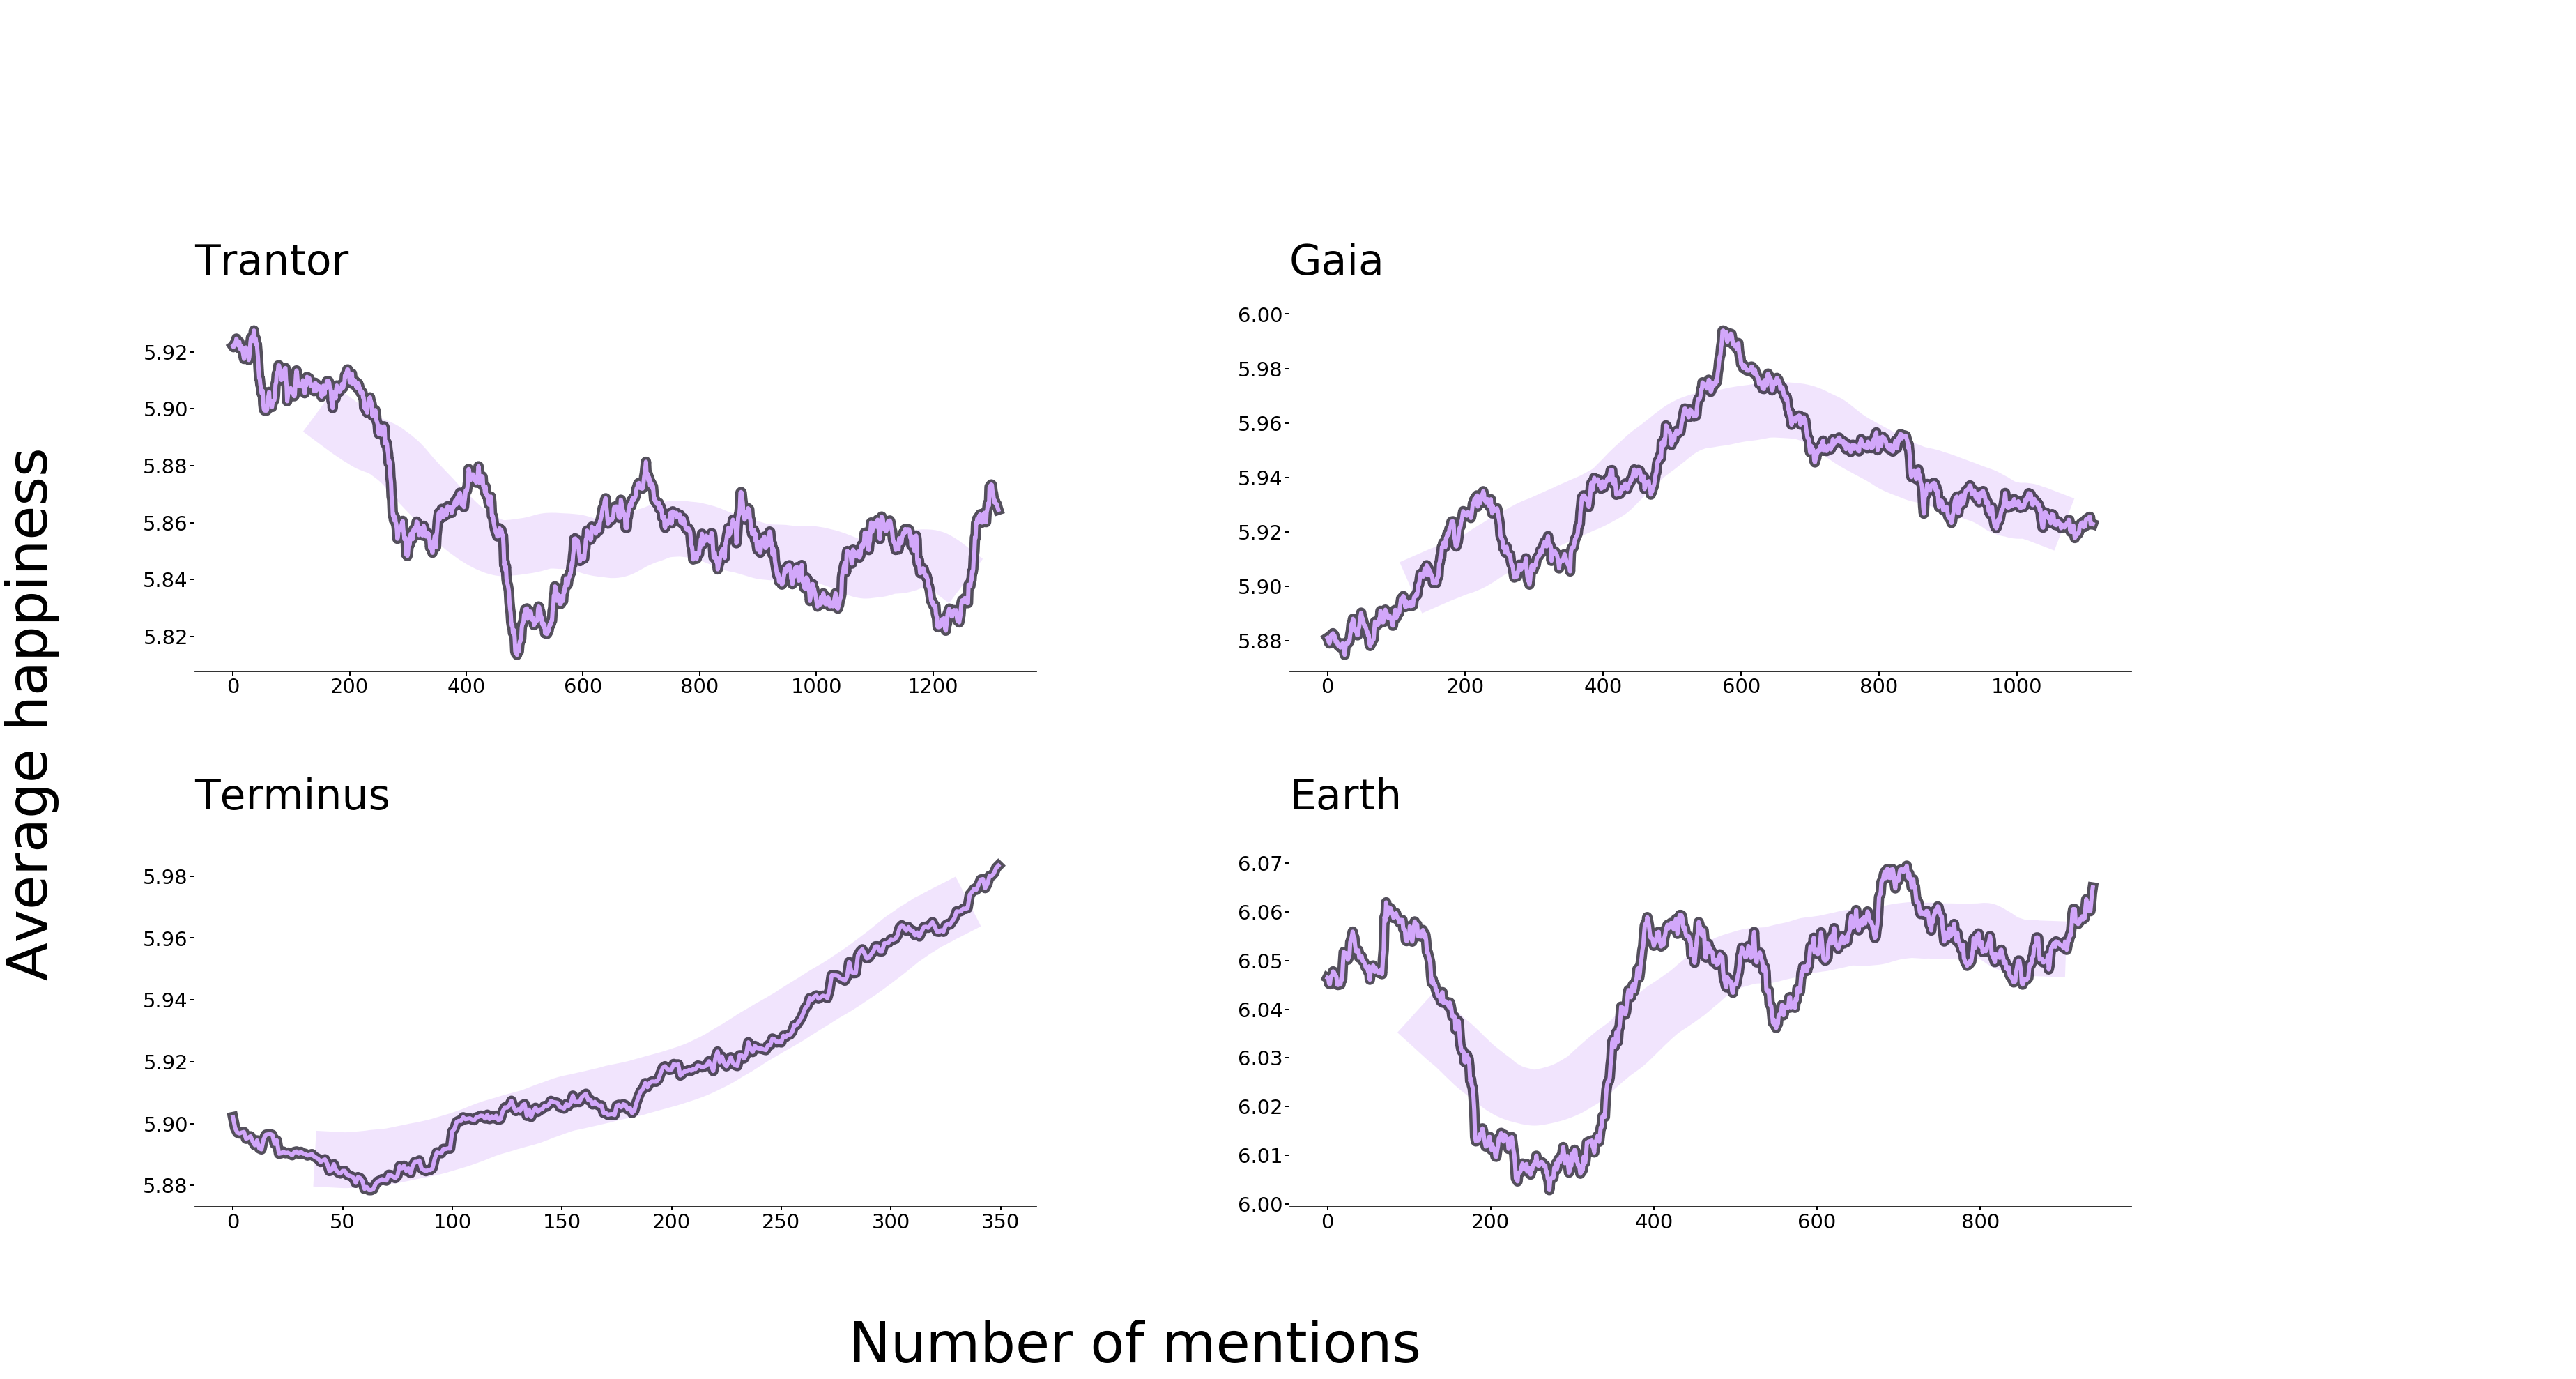

In [4]:
### visualize the emotional arcs and their
### binned trends 
def add_arc(world, ax):
    
    c1 = '#1B1526'
    c2 = '#D2A7FA'
    t, h   = zip(*[(float(line.strip().split('\t')[0])/10, float(line.strip().split('\t')[1])) for line in open('../data/happiness_series/' + world + '_happiness2.txt')])
    bt, bh = moving_avg(t, h, int(len(t)/7))
    ax.plot(bt, bh, linewidth = 80, color = c2, alpha = 0.3)
  
    ax.plot(t, h, linewidth = 15, color = c1, alpha = 0.75)
    ax.plot(t, h, linewidth = 6, color = c2)
    ax.set_title(world, y = 1.1, loc = 'left', fontsize = 60)

    format_axis(ax)


f, ax = plt.subplots(2,2,figsize=(40,20))
   
add_arc('Trantor',  ax[0,0])  
add_arc('Terminus', ax[1,0])  
add_arc('Gaia',     ax[0,1])  
add_arc('Earth',    ax[1,1])  

plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.5)

ax[1,1].set_xlabel('Number of mentions' + ' '.join([' ' for i in range(33)]), fontsize = 80, ha='center', labelpad = 125)
ax[0,0].set_ylabel('Average happiness'  + ' '.join([' ' for i in range(13)]), fontsize = 80, ha='center', labelpad = 120)

#plt.savefig('figures/3_arcs.png', dpi = 100, bbox_inches = 'tight')